In [5]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline

In [6]:
df = pd.read_csv('SMSSpamCollection' , sep = '\t' , names=['labels' , 'message'])

In [7]:
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [10]:
##Let's make a new column to detect how long the text messages are:
df['length'] = df['message'].apply(len)

In [11]:
df

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Figure size 1080x1440 with 0 Axes>

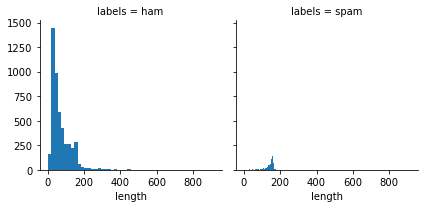

In [12]:
##DATA VISUALISATION

plt.figure(figsize = (15,20))
facet = sns.FacetGrid(df , col='labels' )
facet.map(plt.hist , 'length' , bins = 50)



C:\Conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

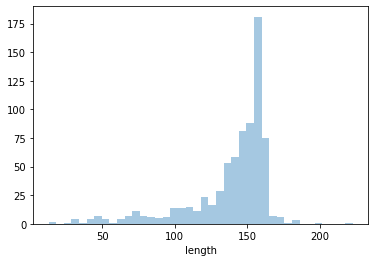

In [13]:
sns.distplot(df[df['labels'] == 'spam']['length'] , kde = False)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

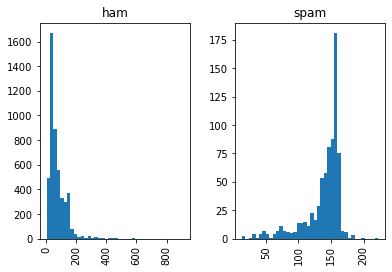

In [14]:
df.hist(column='length' , by = 'labels' , bins = 40)

In [148]:
##Text Preprocessing

def filter_text(message) :
    mess = [c for c in message if c not in string.punctuation]
    mess = ''.join(mess)
    mess = mess.split()
    final_message = [c for c in mess if c.lower() not in stopwords.words('english')]
    return final_message

In [150]:
mess = 'Sample message! are Are Notice: it has punctuation.'
filter_text(mess)

['Sample', 'message', 'Notice', 'punctuation']

In [89]:
df.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [187]:
##Train Test Split
X = df['message']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
##Creating A Data Pipeline

In [186]:
pipeline = Pipeline([
    ('bow' , CountVectorizer(analyzer = filter_text)) ,
    ('tf_idf' , TfidfTransformer()) ,
    ('classifier' , MultinomialNB())
])

In [189]:
pipeline.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function filter_text at 0x0000015ACA86B048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf_idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [191]:
predictions = pipeline.predict(X_test)

In [193]:
confusion_matrix(y_test , predictions)

array([[1448,    0],
       [  60,  164]], dtype=int64)

In [195]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

